























___
# MINIPROJETO 1

## Maria Clara Lorenzetti Luques
___

## Número de chegadas de turistas internacionais (apenas no mês de janeiro, por via aérea, chegando no estado de São Paulo, de 2010 a 2015, separadas por países)

___
## Itens 1 a 3 - Resolução:

In [86]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from numpy import arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\CD\MiniProjeto1


In [87]:
'''Lendo dados'''

dados = pd.read_csv('spchegadas.csv',encoding='windows-1252', sep=";")

In [88]:
'''Atribuindoo variáveis, observando a variável'''

chegadas = dados.Chegadas
desc = chegadas.describe()
desc

count      336.000000
mean      2822.244048
std       5571.811796
min          0.000000
25%        293.000000
50%       1036.000000
75%       2896.500000
max      48411.000000
Name: Chegadas, dtype: float64

In [89]:
"Definindo valores interessantes"

media = desc[1]
pquad = desc[4]
mediana = desc[5]
tquad = desc[6]

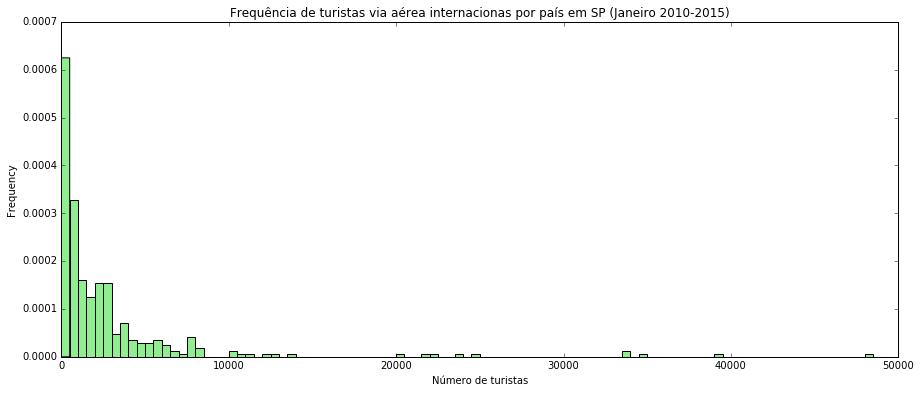

In [90]:
"Histograma dados"

faixa = arange(0,50000,500)
chegadas.plot.hist(bins=faixa, color='lightgreen', figsize=(15,6), normed=1)
plt.xlabel('Número de turistas')
plt.title('Frequência de turistas via aérea internacionas por país em SP (Janeiro 2010-2015)')
plt.show()

___
## Itens 4 a 6 - Resolução:

### Exponencial negativa e assismetria positiva.
### Usarei as funções log normal e exponecial, pois estas têm um formato parecido com o que preciso, que seria uma curva exponencial negativa.

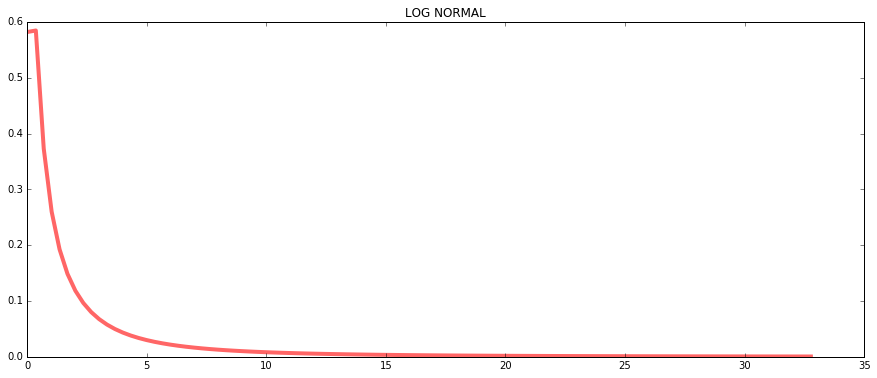

In [91]:
'''Log normal'''

s = 1.5
x = np.linspace(stats.lognorm.ppf(0.01, s), stats.lognorm.ppf(0.99, s), 100)

plt.figure(figsize=(15,6))
plt.plot(x, stats.lognorm.pdf(x, s),'r-', lw=4, alpha=0.6)
plt.title("LOG NORMAL")
plt.show()

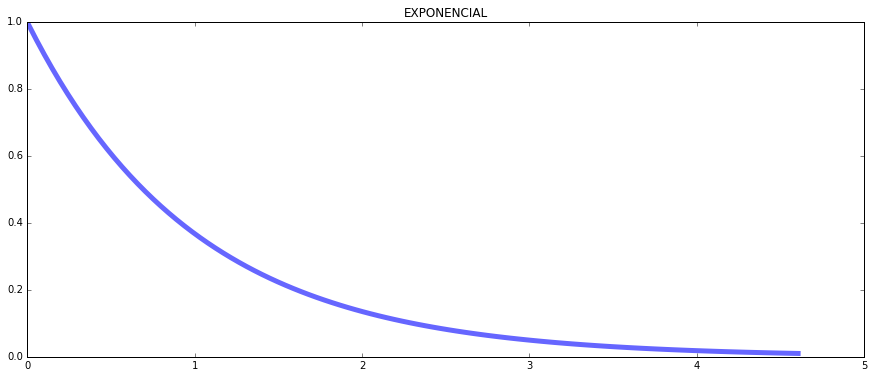

In [92]:
'''Exponencial'''

x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99), 100)
plt.figure(figsize=(15,6))
plt.plot(x, stats.expon.pdf(x), 'b-', lw=5, alpha=0.6, label='expon pdf')
plt.title('EXPONENCIAL')
plt.show()

### Usando a função fit() nas funções teóricas:

s: 1.7518586204847262, loc=-15.289399236675552, scale: 888.0582367364486


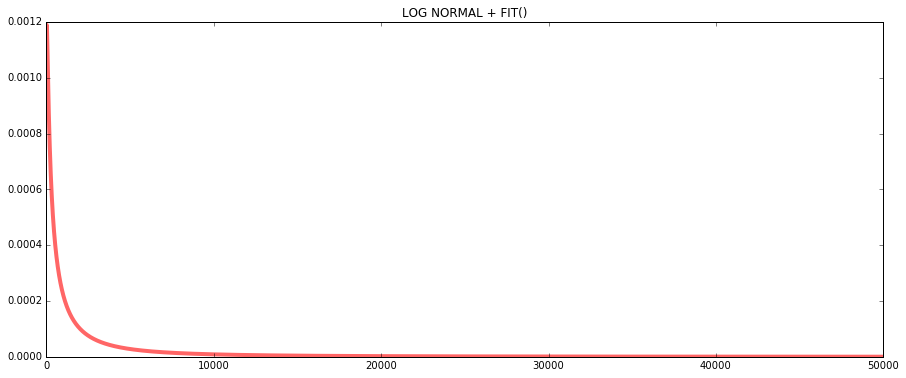

In [93]:
'''Fit na log normal'''

x = range(0,50000,5)
kelly = stats.lognorm.fit(chegadas)
print("s: {0}, loc={1}, scale: {2}".format(kelly[0], kelly[1],kelly[2]))
plt.figure(figsize=(15,6))
plt.plot(x, stats.lognorm.pdf(x,kelly[0], kelly[1],kelly[2]),'r-', lw=4, alpha=0.6)
plt.title("LOG NORMAL + FIT()")
plt.show()

loc=-8.944749603864897e-13, scale: 2822.2441332260632


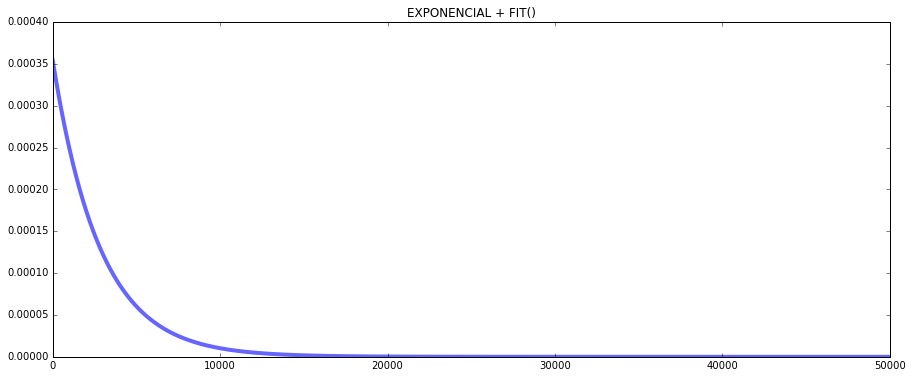

In [94]:
'''Fit na exponencial'''

victor = stats.expon.fit(chegadas)
print("loc={0}, scale: {1}".format(victor[0], victor[1]))
plt.figure(figsize=(15,6))
plt.plot(x, stats.expon.pdf(x,victor[0], victor[1]),'b-', lw=4, alpha=0.6)
plt.title('EXPONENCIAL + FIT()')
plt.show()

___
## Itens 7 a 9 - Resolução:

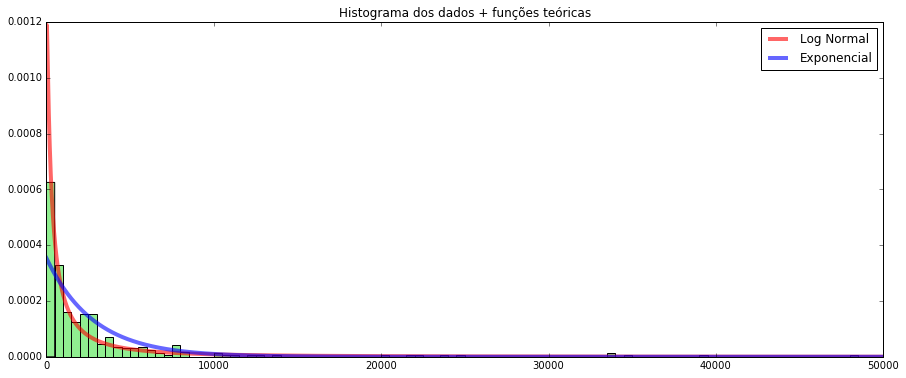

In [95]:
'''Histograma com funções teóricas'''

plt.figure(figsize=(15,6))
plt.hist(chegadas, bins=faixa, color='lightgreen', normed=1)
logn, = plt.plot(x, stats.lognorm.pdf(x,kelly[0], kelly[1],kelly[2]),'r-', lw=4, alpha=0.6)
expon, = plt.plot(x, stats.expon.pdf(x,victor[0], victor[1]),'b-', lw=4, alpha=0.6)
plt.legend([logn, expon], ["Log Normal", "Exponencial"], bbox_to_anchor=(1,1))
plt.title('Histograma dos dados + funções teóricas')
plt.show()

### Observa-se no gráfico acima que ambas as funções, após o uso da função fit(), se enquadram bem no formato do histograma, representando então uma boa escolha de funções teóricas.

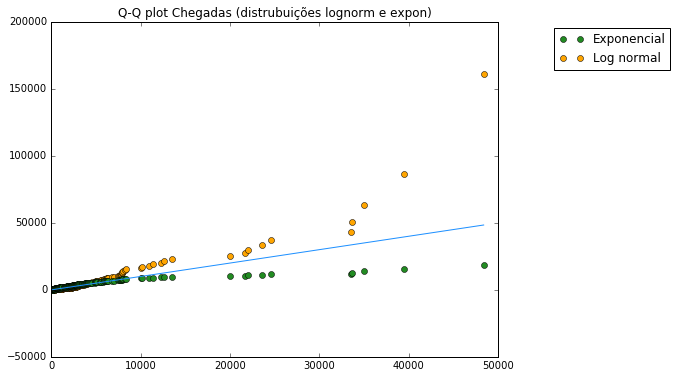

In [96]:
'''Fazendo o Q-Q plot'''

chegadas=sorted(chegadas)
fra = [] # frequencia relativa acumulada
for i in range(len(chegadas)):
    acumulada = (i + 0.5) / len(chegadas)
    if acumulada < 0:
        acumulada = 0
    fra.append(acumulada)

fra = pd.Series(data=fra)

q_log = stats.lognorm.ppf(fra, kelly[0], kelly[1], kelly[2]) 
q_exp = stats.expon.ppf(fra, victor[0], victor[1]) 

fig = plt.figure(figsize=(8,6))

plt.title("Q-Q plot Chegadas (distrubuições lognorm e expon)")

log, = plt.plot(chegadas, q_log, 'o', color="orange", label="Log normal")
exp, = plt.plot(chegadas, q_exp, 'o', color="forestgreen", label = "Exponencial")


plt.plot((min(chegadas), max(chegadas)), (min(chegadas), max(chegadas)), '-', color="dodgerblue")
plt.legend(handles=[exp, log], bbox_to_anchor=(1.4,1))

plt.show()

### Neste gráfico, podemos observar que ambas as funções se afastam da reta de referência, porém a exponencial (verde) se mantém mais próxima que a log normal (dourado).

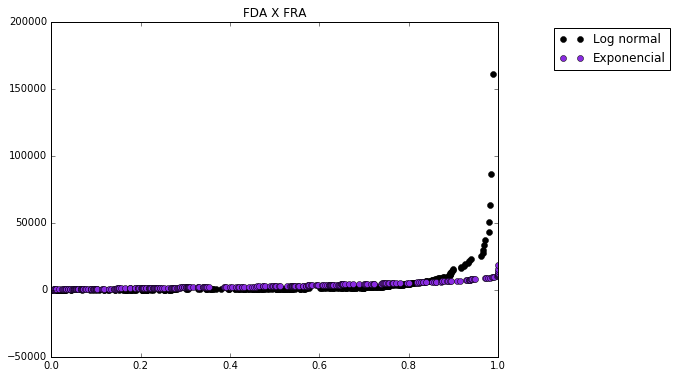

In [97]:
'''Fda vs Fra'''

cdf_log = stats.lognorm.cdf(chegadas, kelly[0], kelly[1], kelly[2])
cdf_exp = stats.expon.cdf(chegadas,  victor[0], victor[1])

plt.figure(figsize=(8,6))
plt.title("FDA X FRA")
log2, = plt.plot(cdf_log, q_log, 'o', color="black", label="Log normal")
exp2, = plt.plot(cdf_exp, q_exp, 'o', color="blueviolet", label = "Exponencial")
plt.legend(handles=[log2, exp2], bbox_to_anchor=(1.4,1))
plt.show()

### Neste gráfico também observamos um maior afastamento da função log normal, enquanto a função exponencial mantém um padrão mais alinhado.

___
## Itens 10 e 11 - Resolução:

### Calculando os erros:

In [98]:
'''Erro quadrático'''

eq_log = sum((chegadas - q_log)**2)
eq_exp = sum((chegadas - q_exp)**2)

print("Erro quadrático da log normal: {:4.3f}".format(eq_log))
print("Erro quadrático da exponencial: {:4.3f}".format(eq_exp))

Erro quadrático da log normal: 17354553852.662
Erro quadrático da exponencial: 3697091052.023


In [99]:
'''Erro quadrático médio'''

eqm_log = eq_log/len(chegadas)
eqm_exp = eq_exp/len(chegadas)

print("Erro quadratico médio da log normal: ", eqm_log)
print("Erro quadratico médio da exponencial: ", eqm_exp)

Erro quadratico médio da log normal:  51650457.8948
Erro quadratico médio da exponencial:  11003247.1786


In [100]:
'''Soma das Diferenças'''

sd_log = sum(abs(chegadas - q_log))
sd_exp = sum(abs(chegadas - q_exp))

print("Soma de diferenças da log noraml: ", sd_log)
print("Soma de diferenças da exponencial: ", sd_exp)

Soma de diferenças da log noraml:  459389.197611
Soma de diferenças da exponencial:  389503.562299


In [101]:
'''Erro quadrático cdfs'''

eqcdf_log = sum((fra - cdf_log)**2)
eqcdf_exp = sum((fra - cdf_exp)**2)

print("Erro quadrático da CDF da log normal versus F.R.A: ", eqcdf_log)
print("Erro quadrático da CDF da exponencial versus F.R.A: ", eqcdf_exp)

Erro quadrático da CDF da log normal versus F.R.A:  0.649472705102
Erro quadrático da CDF da exponencial versus F.R.A:  4.74145858628


In [102]:
sdcdf_log = sum(abs(fra - cdf_log))
sdcdf_exp = sum(abs(fra - cdf_exp))

print("Erro da soma do módulo das diferenças da log normal versus F.R.A: {0}".format(sdcdf_log))
print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0}".format(sdcdf_exp))

Erro da soma do módulo das diferenças da log normal versus F.R.A: 12.637050982069555
Erro da soma do módulo das diferenças da exponencial versus F.R.A: 35.578732868197235


In [103]:
'''Kolmogorov-Smirnov'''

ks_log = max(abs(fra-cdf_log))
ks_exp = max(abs(fra-cdf_exp))

print("Teste K-S para a log com scale={:4.3f}, loc=0 e s={:4.3f}: {:4.3f}".format(kelly[2], kelly[0], ks_log))
print("Teste K-S para a exponencial com μ= {:4.2f}: {:4.3f}".format(media, ks_exp))

Teste K-S para a log com scale=888.058, loc=0 e s=1.752: 0.087
Teste K-S para a exponencial com μ= 2822.24: 0.198


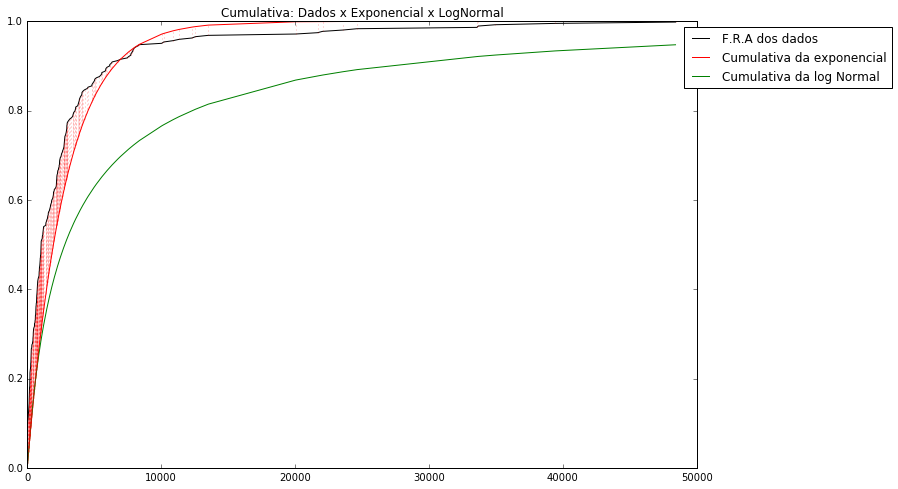

In [104]:
'''Cumulativa'''

cdf_log = stats.lognorm.cdf(chegadas, kelly[0], kelly[1],scale=media)
cdf_exp = stats.expon.cdf(chegadas, victor[0], victor[1])


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x LogNormal")

dados_fra_plot, = plt.plot(chegadas, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(chegadas, cdf_exp, '-', color='red', label = "Cumulativa da exponencial")
cdf_log_plot, = plt.plot(chegadas, cdf_log, '-', color='green', label = "Cumulativa da log Normal")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_log_plot], bbox_to_anchor=(1.3,1))

for i in range(len(chegadas)):
    plt.plot((chegadas[i], chegadas[i]), (fra[i], cdf_exp[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    #plt.plot((chegadas[i], chegadas[i]), (fra[i], cdf_log[i]), '--', color="green", alpha=0.3)

### No gráfico podemos observar que a função cumulativa da log normal se afasta bem mais da linha de FRA dos dados, enquanto a da exponencial se mantém mais próxima.

In [105]:
'''Tabela para contraste e escolha'''

'Tabela para contraste e escolha'

### Esta tabela contém os erros calculados anteriormente.

|FUNÇÃO/ERRO|LOG NORMAL|EXPONENCIAL|
|-|-|-|
|ERRO QUADRÁTICO|17.354.553.852,662|3.697.091.052,023|
|ERRO QUADR. MÉDIO|516.504.57,8948|11.003.247,1786|
|SOMA DAS DIFERENÇAS|459.389,197|389.503,562|
|ERRO QUADRÁTICO CDF VS FRA|10,9|4,74|
|ERRO SOMA DIFERENÇAS VS FRA|56,79424|35,57873|
|KOLMOGOROV-SMIRNOV|0,258|0,198|

## Observando este resumo de erros, e também o último gráfico, pode-se concluir que a função teórica que melhor se ajusta ao modelo é a exponencial, que teve erros menores em todos os testes.